In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

</font> <img src="Banner2.png" width="900" height="250" align="center"/>

</font> <img src="TeamC.png" width="800" height=500 align="center"/>

# <font color=li_blue> Table of contents </font>

# <font color=purple> Sections </font>

* [1.Libaries used](#1)
* [2.Dataframes for plots](#2)
* [3. High level Overview](#3)
  * [3.1 Start MariaDB](#3.1)
  * [3.2 Start Hadoop](#3.2)  
  * [3.3 Search for Spark Installation](#3.3)
* [4. Time](#3.4)
  * [3.5 Data Preparation](#3.5)
      * [3.5.1 Raw DataFrame](#3.5.1)
      * [3.5.2 DataFrame Vertices](#3.5.2)
      * [3.5.3 Countries Dataframe Vertices](#3.5.3)
* [5. Future outlook](#3.5.4)

<a id='1'></a>
# <font color=purple> 1. Libraries used </font>

In [ ]:
import csv
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,stat_summary,theme_bw
from plotnine import ggplot, aes, geom_bar, coord_flip,labs
from plotnine import *
import numpy as np
import pandas as pd
import plotnine
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')
from plotnine.data import mpg
%matplotlib inline
from matplotlib import animation
import matplotlib.pyplot as plt
import plotly.graph_objects as go


<div class="alert alert-info" role="alert">

Adding country specific, GDP, PPP and income data from the world bank to the dataframe.  
  
</div>

In [ ]:
df = pd.read_csv('madrid_transactions_country.csv', delimiter=';', skiprows=0, low_memory=False)

In [ ]:
df.columns

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

In [ ]:
df.columns

<div class="alert alert-info" role="alert">

Statistics to see the distribution of the numeric columns  
  
</div>

In [ ]:
df.describe()

<div class="alert alert-info" role="alert">

Heatmap shows from which countries the trasactions are coming from. Clearly, high income countries having transactions in all categories. And low income almost none and only in few categories like sports&Games, Health, Fashion & SHoes, Bar & Restaurants and Accomodation. 
  
</div>

<a id='2'></a>
# <font color=purple> 2. New Dataframes </font>

<div class="alert alert-info" role="alert">

Creating new aggregation of dataframes nfor further analysis
  
</div>

<a id='2.1'></a>
### <font color=li_blue> 2.1. Country and category </font>

In [ ]:
# new df by country and category
df1 =df.groupby(['country_name', 'category','Income_classification','region'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
    # Apply mean of growth(should give the real growth)
    growth_GDP=('GDP growth (annual %)', 'mean'),
)

In [ ]:
sales = df1.groupby(['category'])['sum_amount'].sum().reset_index()

In [ ]:
df1 = df1.merge(sales, left_on='category', right_on ='category', how = 'left')

In [ ]:
df1

<a id='2.2'></a>
### <font color=li_blue> 2.2. Category </font>

In [ ]:
# new df by category
df3 =df.groupby(['category'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
)

In [ ]:
df3

<a id='2.3'></a>
### <font color=li_blue> 2.3. Create for specific country by category </font>

In [ ]:
total = df3.drop(columns =['count_amount'])

In [ ]:
#rename columns
total.rename(columns = {'mean_amount':'total_mean_amount'}, inplace = True)
total.rename(columns = {'sum_amount':'sum_mean_amount'}, inplace = True)
total

In [ ]:
df4 =df.groupby(['country_name', 'category'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
)

In [ ]:
US_sales = df4[df4["country_name"].str.contains('United States of America')]
US_sales.rename(columns = {'mean_amount':'US_mean_amount'}, inplace = True)
FR_sales = df4[df4["country_name"].str.match('France')]
FR_sales.rename(columns = {'mean_amount':'FR_mean_amount'}, inplace = True)
CN_sales = df4[df4["country_name"].str.match('China')]
CN_sales.rename(columns = {'mean_amount':'CN_mean_amount'}, inplace = True)

UK_sales = df4[df4["country_name"].str.match('United Kingdom ')]
UK_sales.rename(columns = {'mean_amount':'UK_mean_amount'}, inplace = True)

#US_sales = df1.groupby('category').filter(lambda x: (x["country_name"] == ['United States of America']).any())
#FR_sales = df1.groupby(['France'])['sum_amount'].sum().reset_index()
#CH_sales = df1.groupby(['China'])['sum_amount'].sum().reset_index()

In [ ]:
US_sales 

In [ ]:
US_FR = US_sales.merge(FR_sales, left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(CN_sales,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(total,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(UK_sales,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.fillna(0)

In [ ]:
US_FR.head()

In [ ]:
df1 = df1.merge(sales, left_on='category', right_on ='category', how = 'left')

In [ ]:
df1['market_share_ctry'] = (df1['sum_amount_x']/df1['sum_amount_y'])

In [ ]:
df1.head()

In [ ]:
#df1[df1.category == ('Health')]
df1.columns

New column for country classification only 

In [ ]:
#max market share to calculate the relative market share, metric that shows a countries position in the market compared to its main competitor.
df1['max_ms'] = df1.groupby(['category'])['market_share_ctry'].transform(max)
df1['relative_MS'] = (df1['market_share_ctry']/df1['max_ms'])

In [ ]:
df1.head()

In [ ]:
df2 = df.groupby(['country_name','Income_classification'],as_index=False).agg(
    # Get mean amount per column for each country
    mean_amount=('amount', 'mean'),
    # Get sum amount per column for each country
    sum_amount=('amount', sum),
    #  Get count amount per column for each country
    count_amount=('amount', 'count'),
    #  Get median amount per column for each country
    median_amount=('amount', 'median'),
    # Apply mean of growth since it is the same for each line by country (should give the real growth)
    growth_GDP=('GDP growth (annual %)', 'mean'),
    # Apply mean of GDP per capita since it is the same for each line (should give the real growth)
    GDP_per_capita = ('GDP per capita (constant 2015 US$)','mean'),
)

In [ ]:
df2['log_mean_amount'] = np.log(df2['mean_amount'])

In [ ]:
sales = df2['sum_amount'].sum()

In [ ]:
df2['percent'] = (df2['sum_amount'] / sales) *100
df2['log_sum_amount'] = np.log(df2['sum_amount'])
df2['log_GDP_per_capita'] = (df2['GDP_per_capita'] / sales) *100
df2['relative_MS'] = df2['percent']/ df2['percent'].max()

In [ ]:
df2['percent'].max()

In [ ]:
df2.head()

In [ ]:
# NEw dataframe 

In [ ]:
df6 = df.groupby(['category','Income_classification'],as_index=False).agg(
    # Get mean amount per column for each country
    mean_amount=('amount', 'mean'),
    # Get sum amount per column for each country
    sum_amount=('amount', sum),
)

<a id='2.4'></a>
### <font color=li_blue> 2.4. Create for specific country by category </font>

In [ ]:
madrid_transactions=pd.read_csv('madrid_transactions_country05.12.2022.csv',sep=';')
madrid_transactions['country-category']=madrid_transactions['country_name']+'-'+madrid_transactions['category']
madrid_transactions['Median Category-Country']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.median)
madrid_transactions['Median Country']=madrid_transactions.groupby(['customer_country']).amount.transform(np.median)
madrid_transactions['Median Category']=madrid_transactions.groupby(['category']).amount.transform(np.median)
category_q1=madrid_transactions.groupby(['category']).amount.quantile(q=0.25)
category_q3=madrid_transactions.groupby(['category']).amount.quantile(q=0.75)
madrid_transactions=madrid_transactions.merge(category_q1,on='category',how='left',suffixes=('','cat_q1'))
madrid_transactions=madrid_transactions.merge(category_q3,on='category',how='left',suffixes=('','cat_q3'))
madrid_transactions['Cat_IQR']=madrid_transactions['amountcat_q3']-madrid_transactions['amountcat_q1']
madrid_transactions['Cat_low_IQR']=madrid_transactions['Median Category']-(1.5*madrid_transactions['Cat_IQR'])
madrid_transactions['Cat_high_IQR']=madrid_transactions['Median Category']+(1.5*madrid_transactions['Cat_IQR'])
madrid_transactions['Cat_Outliers']=np.where((madrid_transactions['amount']<madrid_transactions['Cat_low_IQR']) \
                                             |(madrid_transactions['amount']>madrid_transactions['Cat_high_IQR']),\
                                             'Outlier','')
madrid_transactions=madrid_transactions[madrid_transactions['Cat_Outliers']=='']
madrid_transactions['Median Category-Country']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.median)
madrid_transactions['Median Country']=madrid_transactions.groupby(['customer_country']).amount.transform(np.median)
madrid_transactions['Median Category']=madrid_transactions.groupby(['category']).amount.transform(np.median)
madrid_transactions['Amount_Ctry_Cat']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.sum)
madrid_transactions['Amount_Ctry_Cat']=madrid_transactions['Amount_Ctry_Cat'].astype(int)
df_ranking=madrid_transactions.groupby(['category','customer_country']).amount.sum().reset_index()
df_ranking['Ranking']=df_ranking.groupby(['category']).amount.rank(method="first", ascending=False)
madrid_transactions=madrid_transactions.merge(df_ranking,on=['category','customer_country'],how='left',suffixes=('','rnk'))
madrid_transactions['country_rnk']=madrid_transactions['Ranking'].astype(int).astype(str).str.zfill(2)+'.'+madrid_transactions['country_name']

In [ ]:
madrid_transactions.head()

<a id='3'></a>
# <font color=purple> 3. Market Overview</font>
## <font color=purple> Executive Summary</font>

### <font color=purple> Heatmap <font color=li_blue>distribution of category spending vs income </font>

<div class="alert alert-info" role="alert">

The heatmap graphic gives a good overview of which countries are spending the most with regards to their income classification by the world bank. The highest income counrties do spend in all categories and even in some category show the highest amount of spendings e.g. fashion and shoes. Contrary, the low income countries do not spend much and only in selected categories if any. 
  
</div>

In [ ]:
# Heatmap 
#my_palette = colorRampPalette(rev(brewer.pal(11, "Spectral")))

ggplot(df6, aes( "Income_classification","category", fill= "sum_amount")) + \
geom_tile()+ ggtitle('Heatmap category spending vs Income') + theme_classic() + \
theme(axis_text_x=element_text(rotation=10, hjust=1)) + labs(y='Category', x='Income classification by World Bank, 2012')+ \
theme(text=element_text(size=9)) 
#+ guides(guide_legend(title = "LEFT"))
#scale_fill_gradient2(low = "lightblue", high = "yellow",guide = "colorbar",aesthetics = "colour")
#plotnine.scale_color_gradient(low="Purple",high="Blue")
#scale_colour_manual(values=["Set3"], limits=[1, 200000])
#scale_color_gradientn(colours='Set3')
#scale_colour_gradientn(colours = myPalette(100), limits=c(1, 8))


#scale_fill_gradient2(low = "lightblue",mid = "pink", high = "yellow",midpoint = 200000,guide = "colorbar",aesthetics = "colour")
#+ plotnine.theme(axis_text_x = plotnine.element_text(angle=90))
#+scale_color_manual(values = colors) 
# scale_color_gradient(low="pink",high="darkgreen")

In [ ]:
#scale_fill_gradient2(low = "lightblue", high = "yellow",guide = "colorbar",aesthetics = "colour")
#plotnine.scale_color_gradient(low="Purple",high="Blue")
#scale_colour_manual(values=["Set3"], limits=[1, 200000])
#scale_color_gradientn(colours='Set3')
#scale_colour_gradientn(colours = myPalette(100), limits=c(1, 8))


#scale_fill_gradient2(low = "lightblue",mid = "pink", high = "yellow",midpoint = 200000,guide = "colorbar",aesthetics = "colour")
#+ plotnine.theme(axis_text_x = plotnine.element_text(angle=90))
#+scale_color_manual(values = colors) 
# scale_color_gradient(low="pink",high="darkgreen")

### <font color=purple> Treemap <font color=li_blue>transactions by regions and countries </font>

<div class="alert alert-info" role="alert">

When there are large numbers of categorial comparions a treemap could be better choice when we are interested in a high level view. This interactive treemap shows the transactions by their regions and within their regions by their countries. You can clearly see that Europe overall has the biggest count of transactions, followed by Americas, Asia and Africa. In Europe is the biggest country count per transaction France, for the Americas it is the US and for Asia it is China.  
</div>

In [ ]:
#Icicle Charts in Python: Icicle charts visualize hierarchical data using rectangular sectors that cascade from root to leaves in one of four directions: up, down, left, or right

In [ ]:
import plotly.express as px

fig = px.icicle(df1, path=[px.Constant("Total transactions"), 'region', 'country_name','category'], values='count_amount',color='region',
                  color_continuous_midpoint=np.average(df1['count_amount'], weights=df1['count_amount']),  
               color_discrete_map={'(?)':'lightgrey', 'Europe':'gold', 'Americas':'turquoise', 'Asia':"darkblue", 'Africa':"pruple", "Oceana":"pink"})

#[px.Constant("world")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(root_color="lightgrey")
fig.show()

In [ ]:
# Boxplot here 

<a id='4'></a>
# <font color=purple> 4. Time </font>

In [ ]:
df3 =df.groupby(['category', 'hour'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount', 'mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
)

In [ ]:
ggplot(df3,aes(x="hour",y="sum_amount",color="category"))+geom_line()+ \
theme_classic()+ \
labs(y='Total Amount Spend', x='Time by hour') +\
theme(text=element_text(size=10))+\
ggtitle('Category Spending by Hour')
#scale_colour_brewer(type="qual", palette="Set3")


### Animations: Bar Races

### Top Country Spenders by the hour

In [ ]:
transaction_per_hour=madrid_transactions.groupby (['hour','customer_country','country_name','region'])['amount'].sum()
transaction_per_hour=transaction_per_hour.reset_index()

barchartrace_data  =transaction_per_hour.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', ['customer_country','country_name'], 'amount')
barchartrace_data['hour'] = barchartrace_data.index

barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))

barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name =['customer_country','country_name'], value_name  = 'amount')



import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}
font2 = {
    'weight': 'normal',
    'size'  :  16,
    'color': 'darkred'
}
font_titles = {
    'weight': 'demibold',
    'size'  :  20,
    'color': 'darkred'
}
hours = barchartrace_data['hour'].unique()

label = ax.text(0.95, 0.20, hours[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
continent = transaction_per_hour[['customer_country','region']].drop_duplicates().reset_index(drop = True)

# # 2. Add continent info
barchartrace_data = barchartrace_data.merge(continent,left_on = 'customer_country', right_on = 'customer_country')
conditions = [
          barchartrace_data['region'] == 'Europe',
          barchartrace_data['region'] == 'Asia',
          barchartrace_data['region'] == 'Americas',
          barchartrace_data['region'] == 'Oceania',
          barchartrace_data['region'] == 'Africa',
 ]

values = ['#0275d8', '#5cb85c', '#5bc0de', '#f0ad4e', '#d9534f']

barchartrace_data['color'] = np.select(conditions, values)

df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]
    data_temp=data_temp.sort_values(by='ranking', ascending=True)
    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label=data_temp['country_name'],
#            ,color=colors)
            color=data_temp['color'])
    
    category=data_temp[['ranking','country_name']]
    position_labels=data_temp['amount'].max()/2
    plt.text(position_labels,1,category.iloc[0,1],ha='center',fontdict=font2)
    plt.text(position_labels,2,category.iloc[1,1],ha='center',fontdict=font2)
    plt.text(position_labels,3,category.iloc[2,1],ha='center',fontdict=font2)
    plt.text(position_labels,4,category.iloc[3,1],ha='center',fontdict=font2)
    plt.text(position_labels,5,category.iloc[4,1],ha='center',fontdict=font2)
    
    label = ax.text(0.95, 0.05, 'Bars are colored by Region',
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font2)
    ax.set_yticklabels(data_temp['region'],fontdict=font2)
    
    

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Country of Origin",fontdict=font_titles)
    plt.xlabel("Total Amount Spend",fontdict=font_titles)
    plt.title("Top Country Spenders by the hour",fontdict=font_titles)

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Countries_notransition.gif', fps=10)  

### Top Categories by the hour

<a id='5'></a>
# <font color=purple> 5. Future outlook and Strategy </font>

### <font color=purple> 5. Boston Consulting Matrix  <font color=li_blue> Strategic investment and deinvesture decisions </font>

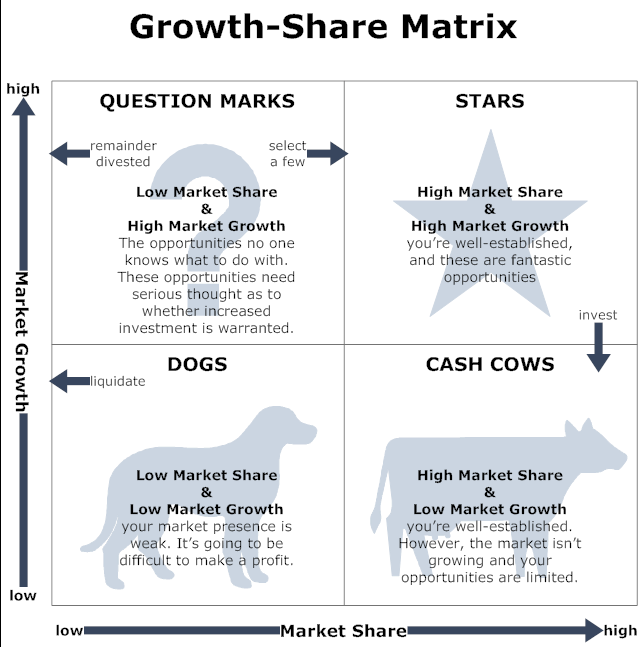

In [ ]:
data = px.scatter(df1, x='relative_MS', y='growth_GDP', color='category',size='sum_amount_x', hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Market Share of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP per Capity, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-10,10], 
    title='BCG Matrix Countries Growth vs Market Share',
    yaxis=dict(title='GDP growth, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[0,1.05],
    xaxis=dict(title='Relative MS by category, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=0.5, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=0.25
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=0.75
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.75
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.25
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=US_FR['US_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='United States of America'
))

#fig.add_trace(go.Scatterpolar(
#      r=US_FR['CN_mean_amount'],
#      theta=US_FR['category'],
#      fill='toself',
#      name='China'
#))

fig.add_trace(go.Scatterpolar(
      r=US_FR['total_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='Mean all countries'
))

fig.add_trace(go.Scatterpolar(
      r=US_FR['UK_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='United Kingdom'
))

fig = fig.update_layout(
    title='Mean Spending of UK vs America vs total mean')

fig.show()

In [ ]:
from plotnine import *
(
    ggplot(df)
    + facet_grid(facets="~daytime ")
    + aes(x="weekday", y="amount", fill="region")
    + labs(
        x="day_type",
        y="amount",
    )
    + geom_col()
)

<a id='2.4'></a>
### <font color=red> round values up , bring countries back, same length for all notebooks, check if barchart can stay fixed, values on end?, adjust size of graphic last resort use country codes </font>

In [ ]:
import matplotlib.pyplot as plt
import plotnine as p9
import pandas as pd
import numpy as np
from copy import copy
from ipywidgets import widgets
from IPython.display import display

from plotnine.data import mtcars

In [ ]:
#pip install ipywidgets

In [ ]:
# Prepre the list we will use to selec sub-sets of data based on number of cylinders.
List = np.unique(madrid_transactions['category'] )

In [ ]:
type(list(List))

In [ ]:


cylSelect = widgets.Dropdown(
    options=list(List),
    value=List[1],
    description='Category:',
    disabled=False,
)

# For the widgets to update the same plot, instead of creating one new image every time
# a selection changes. We keep track of the matplotlib image and axis, so we create only one
# figure and set of axis, for the first plot, and then just re-use the figure and axis
# with plotnine's "_draw_using_figure" function.
fig = None
axs = None

In [ ]:
Category = cylSelect.value
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat','Median Category']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'#7fbf7b','#f0f0f0')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')
Transaction_value['Median Category']=Transaction_value['Median Category'].round(0).astype(int)




# This has to be used the first time you make a plot. This magic allows the notebook to update plots.
%matplotlib notebook

p = ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
    geom_point(aes('country_rnk',"Median Country"),color='#1c9099',shape='|',size=15,stroke=1) \
    + xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
    + geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
    + geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y='Median Category')\
    + coord_flip() \
    + labs(caption =  "("+Category+")") + theme_classic()




def transactions_by_category(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    Category = cylSelect.value
    Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
    [['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat','Median Category']].drop_duplicates() \
    .sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
    Transaction_value.reset_index(drop=True,inplace=True)
    Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'#7fbf7b','#f0f0f0')
    Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')
    Transaction_value['Max']=Transaction_value['Median Category-Country'].max()*0.9
    p = ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
    geom_point(aes('country_rnk',"Median Country"),color='#1c9099',shape='|',size=15,stroke=1) \
    + xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
    + coord_flip() \
    + theme_classic() + theme(figure_size=(16, 8),legend_direction = 'horizontal',legend_position = 'bottom') + labs(caption =  "("+Category+")") 
  
    



    if fig is None:
        # If this is the first time a plot is made in the notebook, we let plotnine create a new
        # matplotlib figure and axis.
        fig, plot = p.draw(return_ggplot=True)
        axs = plot.axs
  
    else:

        #p = copy(p)
        # This helps keeping old selected data from being visualized after a new selection is made.
        # We delete all previously reated artists from the matplotlib axis.
        for artist in plt.gca().lines +\
                        plt.gca().collections +\
                        plt.gca().artists + plt.gca().patches + plt.gca().texts:
            artist.remove()

        # If a plot is being updated, we re-use the figure an axis created before.
        p._draw_using_figure(fig, axs)

In [ ]:
cylSelect.observe(transactions_by_category, 'value')

# Display the widgets
display(cylSelect)


# Plots the first image, with inintial values.
transactions_by_category()